In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import plotly.graph_objs as go
import plotly.plotly as py
from IPython.display import display, clear_output, Image
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [115]:
import plotly
plotly.tools.set_credentials_file(username = "amandaywu", api_key = "hLtAhexN2y8QXQ4ETAEf")

In [3]:
# # load data 
# house_1 = pd.read_csv("processed/house_01.csv")
# house_2 = pd.read_csv("processed/house_02.csv")
# house_3 = pd.read_csv("processed/house_03.csv")
# house_4 = pd.read_csv("processed/house_04.csv")
# house_5 = pd.read_csv("processed/house_05.csv")
# house_6 = pd.read_csv("processed/house_06.csv")

# House 1

In [4]:
house_1 = pd.read_csv("processed/house_01.csv")
display(house_1.head())
display(house_1.describe())

,Unnamed: 0,date,occupancy,Fridge,Dryer,Coffee machine,Kettle,Washing machine,Freezer
0,0,2012-06-01 00:00:00,NaN,49.2516,830.508,NaN,0.0,4.39739,2.23178
1,1,2012-06-01 00:00:01,NaN,49.2516,834.774,NaN,0.0,4.39739,2.23178
2,2,2012-06-01 00:00:02,NaN,49.2516,834.774,NaN,0.0,4.39739,2.23178
3,3,2012-06-01 00:00:03,NaN,51.3899,832.641,NaN,0.0,4.39739,2.23178
4,4,2012-06-01 00:00:04,NaN,49.2516,832.641,NaN,0.0,6.53380,2.23178


,Unnamed: 0,occupancy,Fridge,Dryer,Coffee machine,Kettle,Washing machine,Freezer
count,2.419200e+06,0.0,2.419200e+06,2.419200e+06,0.0,2.160000e+06,2.419200e+06,2.419200e+06
mean,1.209600e+06,NaN,2.185438e+01,2.369411e+01,NaN,3.593142e+00,2.317556e+01,1.859330e+01
std,6.983630e+05,NaN,2.532282e+01,1.333412e+02,NaN,8.151185e+01,1.818361e+02,1.561907e+01
min,0.000000e+00,NaN,-1.000000e+00,-1.000000e+00,NaN,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.047998e+05,NaN,2.205780e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.231780e+00
50%,1.209600e+06,NaN,4.344320e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,3.027450e+01
75%,1.814399e+06,NaN,4.711320e+01,0.000000e+00,NaN,0.000000e+00,4.397390e+00,3.243160e+01
max,2.419199e+06,NaN,9.849370e+02,9.648820e+02,NaN,1.891870e+03,2.387580e+03,8.204040e+01


In [6]:
print(house_1.columns)
print(house_1.shape)
print(house_1.isna().sum())
house_1.date = pd.to_datetime(house_1.date)
print(type(house_1.date[0]))
display(house_1.head())

Index(['Unnamed: 0', 'date', 'occupancy', 'Fridge', 'Dryer', 'Coffee machine',
       'Kettle', 'Washing machine', 'Freezer'],
      dtype='object')
(2419200, 9)
Unnamed: 0               0
date                     0
occupancy          2419200
Fridge                   0
Dryer                    0
Coffee machine     2419200
Kettle              259200
Washing machine          0
Freezer                  0
dtype: int64
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Unnamed: 0,date,occupancy,Fridge,Dryer,Coffee machine,Kettle,Washing machine,Freezer
0,0,2012-06-01 00:00:00,NaN,49.2516,830.508,NaN,0.0,4.39739,2.23178
1,1,2012-06-01 00:00:01,NaN,49.2516,834.774,NaN,0.0,4.39739,2.23178
2,2,2012-06-01 00:00:02,NaN,49.2516,834.774,NaN,0.0,4.39739,2.23178
3,3,2012-06-01 00:00:03,NaN,51.3899,832.641,NaN,0.0,4.39739,2.23178
4,4,2012-06-01 00:00:04,NaN,49.2516,832.641,NaN,0.0,6.53380,2.23178


In [85]:
house_1=house_1.drop("Coffee machine", axis = 1)
house_1.head()

,Unnamed: 0,date,occupancy,Fridge,Dryer,Kettle,Washing machine,Freezer
0,0,2012-06-01 00:00:00,NaN,49.2516,830.508,0.0,4.39739,2.23178
1,1,2012-06-01 00:00:01,NaN,49.2516,834.774,0.0,4.39739,2.23178
2,2,2012-06-01 00:00:02,NaN,49.2516,834.774,0.0,4.39739,2.23178
3,3,2012-06-01 00:00:03,NaN,51.3899,832.641,0.0,4.39739,2.23178
4,4,2012-06-01 00:00:04,NaN,49.2516,832.641,0.0,6.53380,2.23178


# Pt 1. Seasonality Check

## 1.1 Group by Hour

In [86]:
house_1_by_hour = house_1.groupby([house_1.date.dt.hour]).mean().reset_index()
print(house_1_by_hour.shape)
house_1_by_hour.head()

(24, 8)


,date,Unnamed: 0,occupancy,Fridge,Dryer,Kettle,Washing machine,Freezer
0,0,1168199.5,NaN,18.523430,3.676883,-0.120000,2.765274,19.338957
1,1,1171799.5,NaN,18.804336,0.093726,-0.119952,2.765695,17.763389
2,2,1175399.5,NaN,16.678663,0.100207,-0.119904,2.737536,19.302995
3,3,1178999.5,NaN,20.206692,0.093120,-0.107293,2.722851,17.749318
4,4,1182599.5,NaN,16.755176,0.100728,-0.080000,43.008278,19.148808


In [87]:
data1 = go.Scatter(x=house_1_by_hour.date, y=house_1_by_day.Freezer, name="Freezer")
data2 = go.Scatter(x=house_1_by_hour.date, y=house_1_by_day.Dryer, name="Dryer")
#data3 = go.Scatter(x=house_1_by_hour.date, y=house_1_by_day["Coffee machine"], name="Coffee machine")
data4 = go.Scatter(x=house_1_by_hour.date, y=house_1_by_day.Kettle, name ="Kettle")
data5 = go.Scatter(x=house_1_by_hour.date, y=house_1_by_day["Washing machine"], name="Washing machine")
data6 = go.Scatter(x=house_1_by_hour.date, y=house_1_by_day.Freezer)

layout = dict(title = 'House 1 Usage by Hour',
              xaxis = dict(title = 'Hour'),
              yaxis = dict(title = 'Usage'),
              )
fig = dict(data=[data1,data2,data4,data5,data6], layout=layout)
py.iplot(fig)

## 1.2 Group by Day

In [88]:
# group by day 
house_1_by_day = house_1.groupby([house_1.date.dt.date]).mean().reset_index()
print(house_1_by_day.shape)
house_1_by_day.head()

(28, 8)


,date,Unnamed: 0,occupancy,Fridge,Dryer,Kettle,Washing machine,Freezer
0,2012-06-01,43199.5,NaN,20.142000,18.693987,1.834326,34.554108,18.012338
1,2012-06-02,129599.5,NaN,22.649126,0.045964,-0.007013,0.068509,18.143425
2,2012-06-03,215999.5,NaN,21.890368,110.810117,2.674175,32.202940,18.316917
3,2012-06-04,302399.5,NaN,23.608796,0.043519,3.143868,10.614389,17.863091
4,2012-06-05,388799.5,NaN,19.435466,0.055373,9.006000,0.837003,18.159845


In [89]:
data1 = go.Scatter(x=house_1_by_day.date, y=house_1_by_day.Freezer, name="Freezer")
data2 = go.Scatter(x=house_1_by_day.date, y=house_1_by_day.Dryer, name="Dryer")
#data3 = go.Scatter(x=house_1_by_day.date, y=house_1_by_day["Coffee machine"], name="Coffee machine")
data4 = go.Scatter(x=house_1_by_day.date, y=house_1_by_day.Kettle, name ="Kettle")
data5 = go.Scatter(x=house_1_by_day.date, y=house_1_by_day["Washing machine"], name="Washing machine")
data6 = go.Scatter(x=house_1_by_day.date, y=house_1_by_day.Freezer)
layout = dict(title = 'House 1 Usage by Day',
              xaxis = dict(title = 'Day'),
              yaxis = dict(title = 'Usage'),
              )
fig = dict(data=[data1,data2,data4,data5,data6], layout=layout)
py.iplot(fig)

## 1.3 Group by Weekday

In [90]:
# group by weekday
house_1_by_day.reset_index(inplace=True)
house_1_by_day.date = pd.DatetimeIndex(house_1_by_day.date)
house_1_by_weekday = house_1_by_day.groupby([house_1_by_day.date.dt.weekday]).mean()
print(house_1_by_weekday.shape)
house_1_by_weekday.reset_index(inplace=True)
dates = {0: "Mon", 1: "Tues", 2: "Wed", 3: "Thurs", 4: "Fri", 5: "Sat", 6: "Sun"}
house_1_by_weekday['date'] = house_1_by_weekday['date'].map(dates)
house_1_by_weekday_melted = pd.melt(house_1_by_weekday.drop(house_1_by_weekday.columns[1:3], axis=1), id_vars="date", var_name="types", value_name="count")
house_1_by_weekday_melted.head()

(7, 8)


,date,types,count
0,Mon,occupancy,NaN
1,Tues,occupancy,NaN
2,Wed,occupancy,NaN
3,Thurs,occupancy,NaN
4,Fri,occupancy,NaN


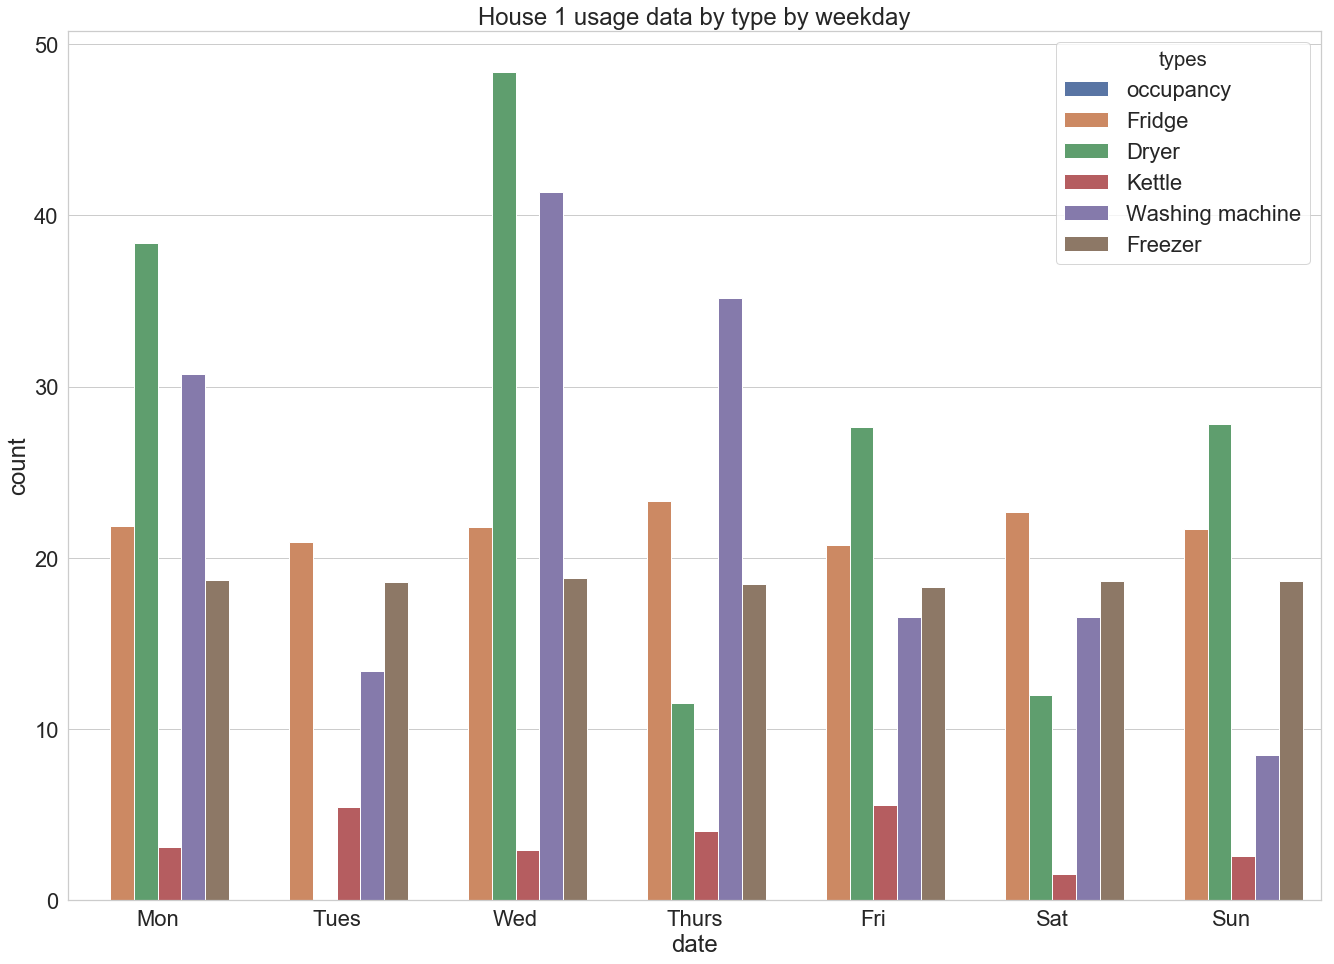

In [91]:
sns.set(style="whitegrid",font_scale = 2)
plt.figure(figsize=(20,16))
ax=sns.barplot(x='date', y='count', hue='types', data=house_1_by_weekday_melted)
ax.set_title('House 1 usage data by type by weekday')
plt.show()

## 1.4 Weekend vs. Weekdays

In [92]:
house_1_by_day = house_1.groupby([house_1.date.dt.date]).sum().reset_index()
house_1_by_day.date = pd.DatetimeIndex(house_1_by_day.date)
house_1_by_weekend = house_1_by_day.groupby([house_1_by_day.date.dt.weekday]).mean()
house_1_by_weekend.reset_index(inplace=True)
dates = {0: "weekday", 1: "weekday", 2: "weekday", 3: "weekday", 4: "weekday", 5: "weekend", 6: "weekend"}
house_1_by_weekend['date'] = house_1_by_weekend['date'].map(dates)
house_1_by_weekend_melted = pd.melt(house_1_by_weekend.drop(house_1_by_weekend.columns[1:3], axis=1), id_vars="date", var_name="types", value_name="count")
house_1_by_weekend_melted.head()

,date,types,count
0,weekday,Fridge,1.889570e+06
1,weekday,Fridge,1.805714e+06
2,weekday,Fridge,1.881627e+06
3,weekday,Fridge,2.013350e+06
4,weekday,Fridge,1.793664e+06


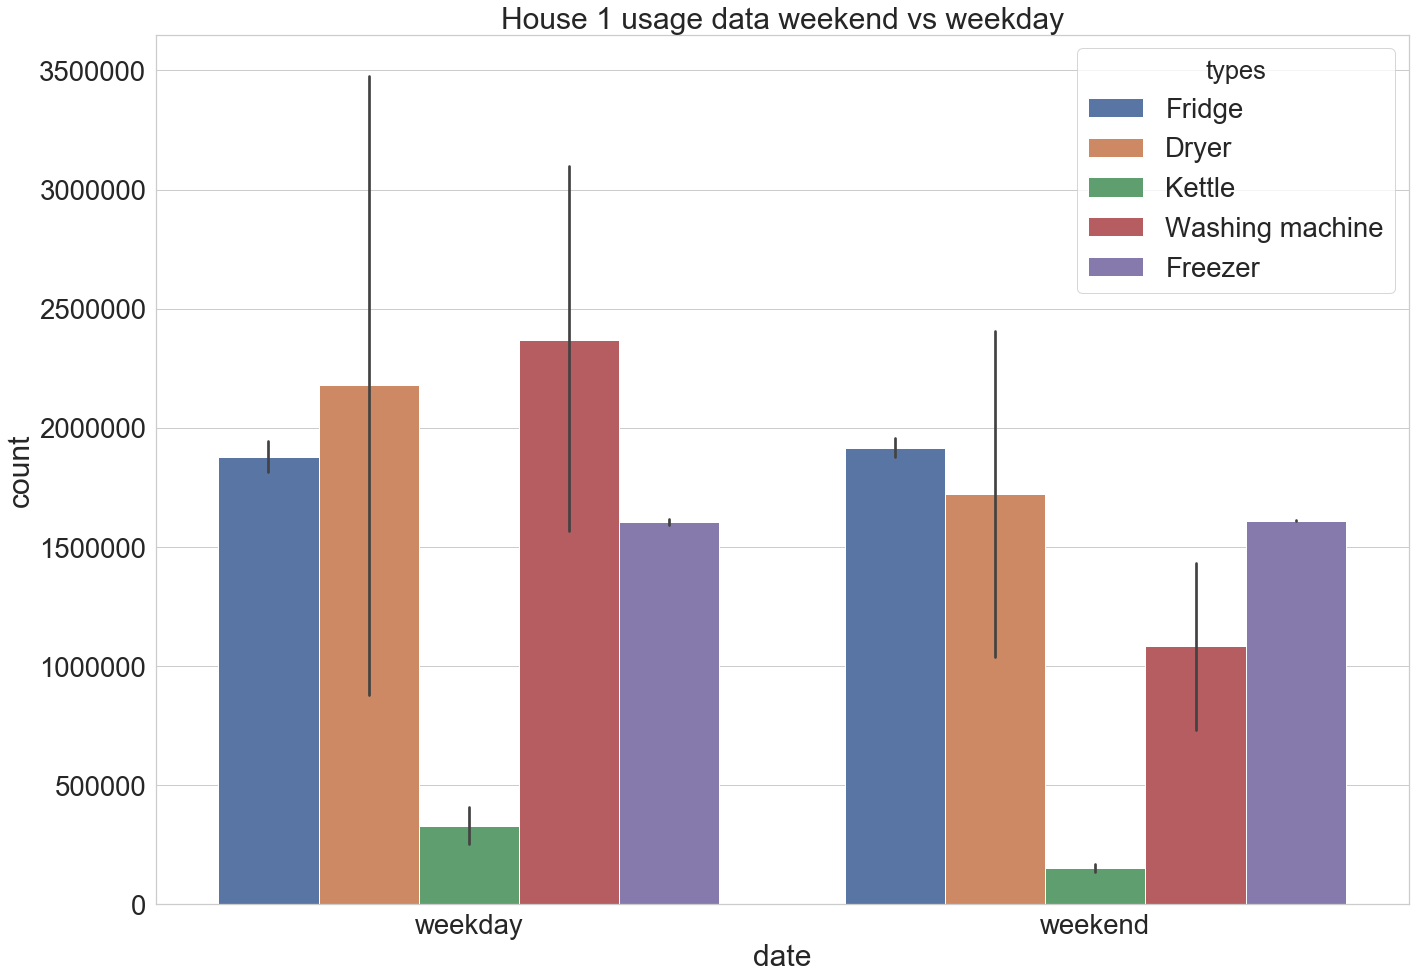

In [93]:
sns.set(style="whitegrid",font_scale = 2.5)
plt.figure(figsize=(20,16))
ax=sns.barplot(x='date', y='count', hue='types', data=house_1_by_weekend_melted)
ax.set_title('House 1 usage data weekend vs weekday')
plt.show()

# Pt 2. Time Series using Plotly and Cufflinks

## 2.1 By Minute

In [94]:
house_1_by_min = house_1.copy()
house_1_by_min.set_index("date", inplace = True)
house_1_by_min = house_1_by_min.asfreq('1Min', method='pad').reset_index()
house_1_by_min.head()


,date,Unnamed: 0,occupancy,Fridge,Dryer,Kettle,Washing machine,Freezer
0,2012-06-01 00:00:00,0,NaN,49.2516,830.508,0.0,4.39739,2.23178
1,2012-06-01 00:01:00,60,NaN,49.2516,830.508,0.0,4.39739,2.23178
2,2012-06-01 00:02:00,120,NaN,49.2516,826.241,0.0,4.39739,32.43160
3,2012-06-01 00:03:00,180,NaN,49.2516,828.375,0.0,4.39739,32.43160
4,2012-06-01 00:04:00,240,NaN,47.1132,299.079,0.0,4.39739,34.58860


In [96]:
data1 = go.Scatter(x=house_1_by_min.date, y=house_1_by_min.Freezer, name="Freezer")
data2 = go.Scatter(x=house_1_by_min.date, y=house_1_by_min.Dryer, name="Dryer")
#data3 = go.Scatter(x=house_1_by_min.date, y=house_1_by_min["Coffee machine"], name="Coffee machine")
data4 = go.Scatter(x=house_1_by_min.date, y=house_1_by_min.Kettle, name ="Kettle")
data5 = go.Scatter(x=house_1_by_min.date, y=house_1_by_min["Washing machine"], name="Washing machine")
data6 = go.Scatter(x=house_1_by_min.date, y=house_1_by_min.Freezer)

layout = dict(title = 'House 1 Usage by Min',
              xaxis = dict(title = 'Mins'),
              yaxis = dict(title = 'Usage'),
              autosize=False, width=800,height=500,)
fig = dict(data=[data1,data2,data4,data5,data6], layout=layout)
py.iplot(fig)

/Users/AmandaWu/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/Users/AmandaWu/anaconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of chart

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

## 2.2 By 15 Minutes

In [32]:
house_1_15mins = house_1.copy()
house_1_15mins.set_index("date", inplace = True)
house_1_15mins = house_1_15mins.asfreq('15Min', method='pad').reset_index()
house_1_15mins.head()

,date,Unnamed: 0,occupancy,Fridge,Dryer,Coffee machine,Kettle,Washing machine,Freezer
0,2012-06-01 00:00:00,0,NaN,49.2516,830.50800,NaN,0.0,4.39739,2.23178
1,2012-06-01 00:15:00,900,NaN,47.1132,6.46354,NaN,0.0,4.39739,32.43160
2,2012-06-01 00:30:00,1800,NaN,0.0000,8.60000,NaN,0.0,4.39739,0.00000
3,2012-06-01 00:45:00,2700,NaN,0.0000,0.00000,NaN,0.0,4.39739,32.43160
4,2012-06-01 01:00:00,3600,NaN,0.0000,0.00000,NaN,0.0,4.39739,32.43160


In [116]:
data1 = go.Scatter(x=house_1_15mins.date, y=house_1_15mins.Freezer, name="Freezer")
data2 = go.Scatter(x=house_1_15mins.date, y=house_1_15mins.Dryer, name="Dryer")
#data3 = go.Scatter(x=house_1_15mins.date, y=house_1_15mins["Coffee machine"], name="Coffee machine")
data4 = go.Scatter(x=house_1_15mins.date, y=house_1_15mins.Kettle, name ="Kettle")
data5 = go.Scatter(x=house_1_15mins.date, y=house_1_15mins["Washing machine"], name="Washing machine")
data6 = go.Scatter(x=house_1_15mins.date, y=house_1_15mins.Freezer)

layout = dict(title = 'House 1 Usage by 15mins',
              xaxis = dict(title = '15mins'),
              yaxis = dict(title = 'Usage'),
              autosize=False, width=800,height=500,)
fig = dict(data=[data1,data2,data4,data5,data6], layout=layout)
py.iplot(fig)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~amandaywu/0 or inside your plot.ly account where it is named 'plot from API'


# Pt 3. Feature Correlations & Characteristics

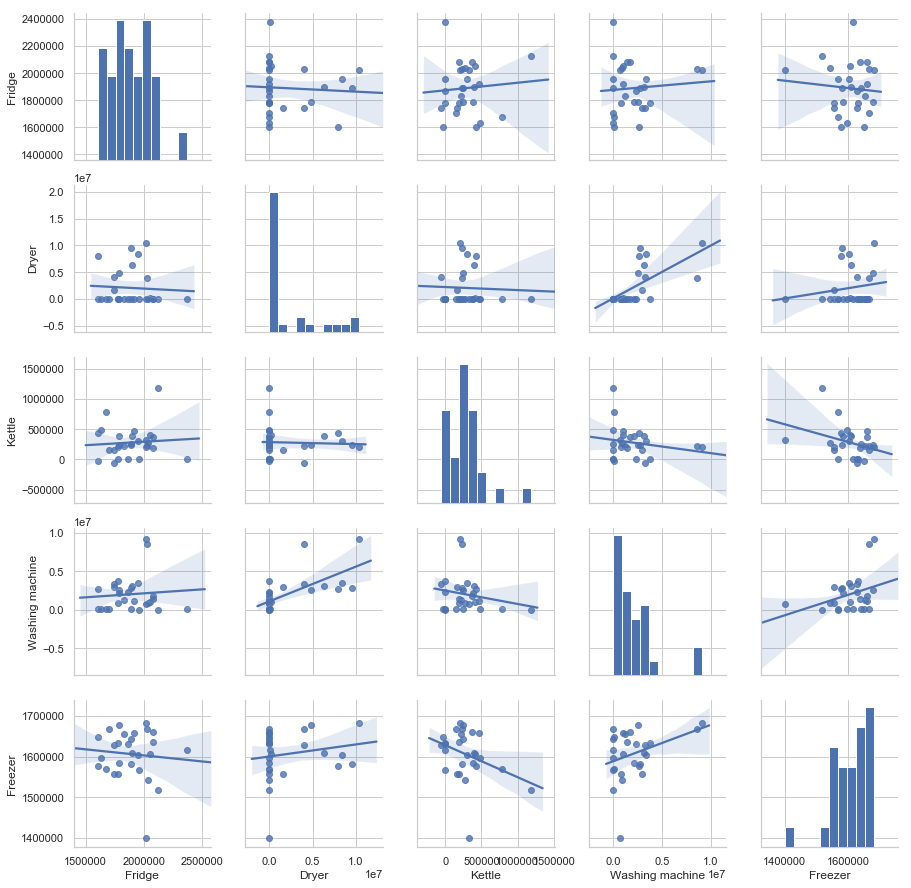

In [98]:
sns.set(style="whitegrid",font_scale = 1)
sns.pairplot(house_1_by_day.drop(house_1_by_day.columns[:3], axis = 1), kind="reg")
plt.show()

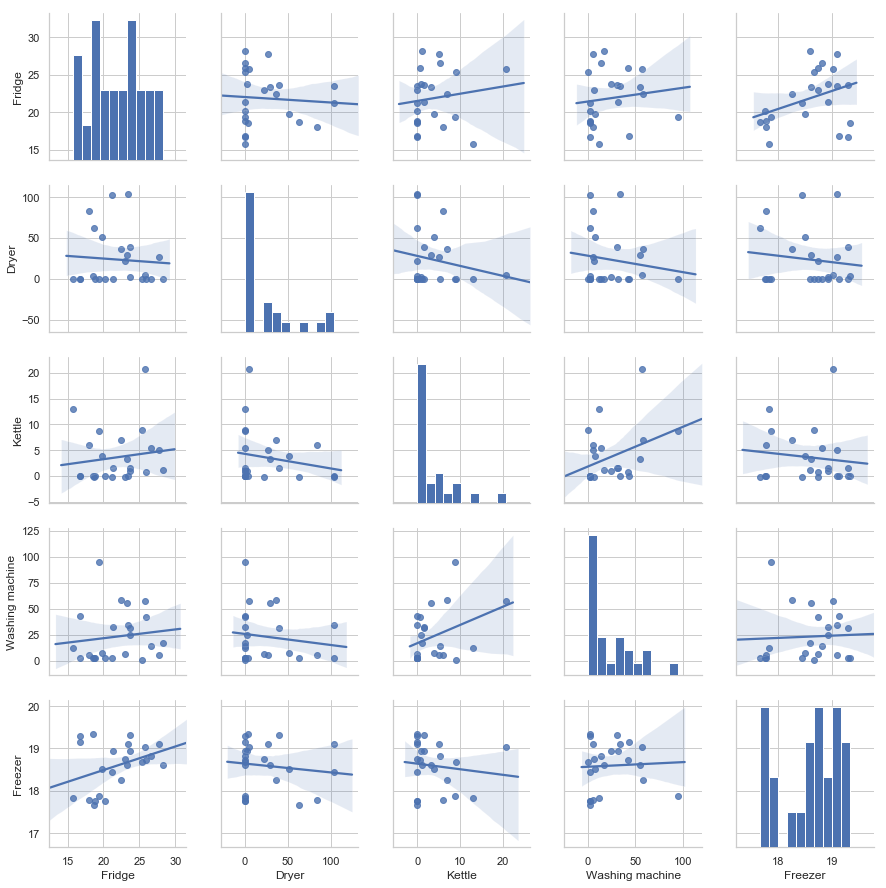

In [99]:
sns.set(style="whitegrid",font_scale = 1)
sns.pairplot(house_1_by_hour.drop(house_1_by_hour.columns[:3], axis = 1), kind="reg")
plt.show()

In [100]:
house_1_by_min.set_index("date", inplace=True)
house_1_min_mean_resampled_by_hour = house_1_by_min.resample('H', how='mean').reset_index(inplace=True)

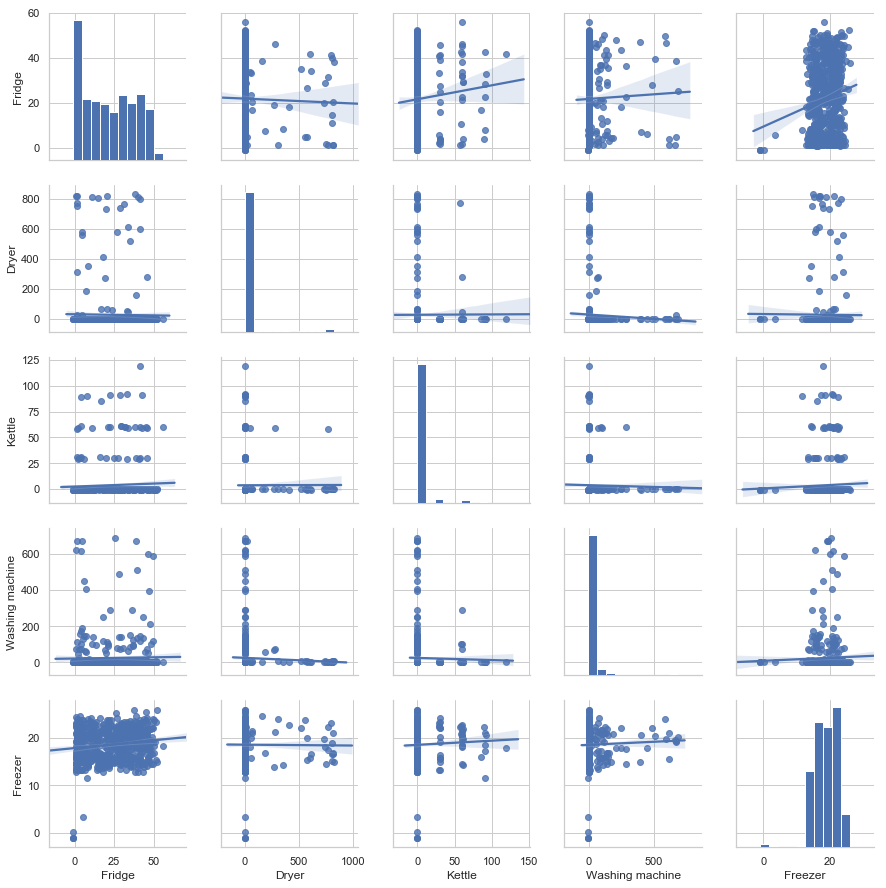

In [110]:
sns.set(style="whitegrid",font_scale = 1)
sns.pairplot(house_1_min_mean_resampled_by_hour.drop(house_1_by_hour.columns[:3], axis = 1).dropna(), kind="reg")
plt.show()

# Pt 4. Fast Fourier Transform

In [111]:
def get_pages(username, page_size):
    url = 'https://api.plot.ly/v2/folders/all?user='+username+'&page_size='+str(page_size)
    response = requests.get(url, auth=auth, headers=headers)
    if response.status_code != 200:
        return
    page = json.loads(response.content)
    yield page
    while True:
        resource = page['children']['next'] 
        if not resource:
            break
        response = requests.get(resource, auth=auth, headers=headers)
        if response.status_code != 200:
            break
        page = json.loads(response.content)
        yield page
        
def permanently_delete_files(username, page_size=500, filetype_to_delete='plot'):
    for page in get_pages(username, page_size):
        for x in range(0, len(page['children']['results'])):
            fid = page['children']['results'][x]['fid']
            res = requests.get('https://api.plot.ly/v2/files/' + fid, auth=auth, headers=headers)
            res.raise_for_status()
            if res.status_code == 200:
                json_res = json.loads(res.content)
                if json_res['filetype'] == filetype_to_delete:
                    # move to trash
                    requests.post('https://api.plot.ly/v2/files/'+fid+'/trash', auth=auth, headers=headers)
                    # permanently delete
                    requests.delete('https://api.plot.ly/v2/files/'+fid+'/permanent_delete', auth=auth, headers=headers)

permanently_delete_files(username, filetype_to_delete='plot')
permanently_delete_files(username, filetype_to_delete='grid')

NameError: name 'username' is not defined

## House 2

In [25]:
house_2 = pd.read_csv("processed/house_02.csv")

In [27]:
display(house_2.head())
# display(house_2.describe())

,Unnamed: 0,date,occupancy,Tablet,Dishwasher,Air exhaust,Fridge,Entertainment,Freezer,Kettle,Lamp,Laptops,Stove,Stereo
0,0,2012-06-01 00:00:00,1.0,2.21504,0.0,0.0,2.21458,0.00000,53.6510,0.0,0.0,0.0,NaN,0.00000
1,1,2012-06-01 00:00:01,1.0,4.32930,0.0,0.0,2.21458,2.17127,55.7929,0.0,0.0,0.0,NaN,2.17127
2,2,2012-06-01 00:00:02,1.0,2.21504,0.0,0.0,0.00000,0.00000,53.6510,0.0,0.0,0.0,NaN,0.00000
3,3,2012-06-01 00:00:03,1.0,2.21504,0.0,0.0,0.00000,0.00000,53.6510,0.0,0.0,0.0,NaN,0.00000
4,4,2012-06-01 00:00:04,1.0,2.21504,0.0,0.0,0.00000,0.00000,55.7929,0.0,0.0,0.0,NaN,0.00000
